In [1]:
import ipywidgets as widgets
import numpy as np
import scipy.stats as sci
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter,FixedLocator, FixedFormatter
import pandas as pd

# MISE EN PLACE DU PAPIER MILLIMÉTRÉ ET DES GRADUATIONS

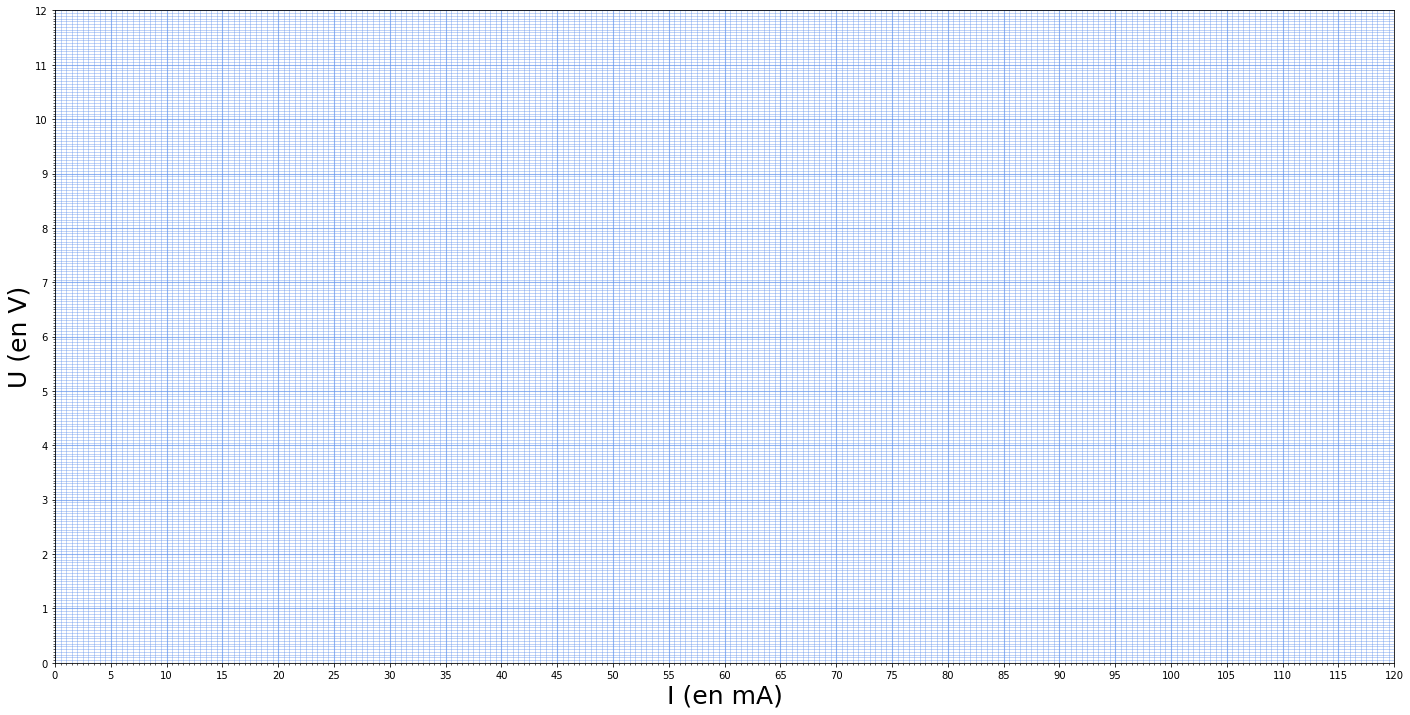

In [88]:
%matplotlib inline

fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot()

major_ticks_top = np.linspace(0,12,13)
minor_ticks_top = np.linspace(0,12,241)
major_ticks_bottom = np.linspace(0,120,25)
minor_ticks_bottom = np.linspace(0,120,241)
ax.set_xlabel('I (en mA)', fontsize=25)
ax.set_ylabel('U (en V)', fontsize=25)
# LA GRILLE
ax.set_xticks(major_ticks_bottom)
ax.set_yticks(major_ticks_top)
ax.set_xticks(minor_ticks_bottom, minor=True)
ax.set_yticks(minor_ticks_top, minor=True)
ax.grid(which='major', alpha=0.7, color='cornflowerblue', lw=1.1)
ax.grid(which='minor', alpha=0.5, color='cornflowerblue', lw=0.8)

# MODÉLISATION MATHÉMATIQUE
Les objectifs de cette partie sont extrèmement importants pour la suite de votre scolarité en Mathématiques et en Physique (*bien au-delà de ce que vous imaginez en ce moment...mais faîtes-moi confiance !*).   

## Qu'est-ce qu'un modèle mathématique ?
Nous allons tenter de trouver un **modèle mathématique de la droite** c'est à dire **trouver l'équation mathématique qui permet d'obtenir une droite** sur un graphique. Pour cela, nous allons calculer la tension électrique *U* à partir de l'intensité électrique  *I* en supposant que l'équation mathématique qui permet de calculer U à partir de I est :  
  
$U_{(en V)} = R \times I_{(en A)}$  

### Méthode utilisée
  Pour cela, un peu de méthode et de bon sens seront nécessaires : on commence toujours par des valeurs numériques **SIMPLES** et **FACILES** pour faire les calculs (*ces calculs doivent être faisables de tête !*).  
    
   Par exemple, si $I = 1A$ et $R=2$, $U=2 \times 1=2 V$.  
   Si $I = 2A$ et $R=2$, $U=2 \times 2=4 V$...et ainsi de suite.

In [23]:
%%html
<style>
/* Any CSS style can go in here. */
.dataframe th {
    font-size: 25px;
}
.dataframe td {
    font-size: 20px;
}
</style>

In [78]:
import matplotlib.lines
def trace_droite2(R=1, relier = False):
    I = np.array([0,1,2,3,4,5,6,7,8,9,10])
    I1 = np.array([[0,1,2,3,4,5,6,7,8,9,10]])
    U = R*I1

    df = pd.DataFrame(U, index=['U (en V)'],
                      columns = ['0','1','2','3','4','5','6','7','8','9','10'])
    
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot()
    ax.set_ylim([0,10])

    major_ticks_top = np.linspace(0,10,11)
    minor_ticks_top = np.linspace(0,10,101)
    major_ticks_bottom = np.linspace(0,10,11)
    minor_ticks_bottom = np.linspace(0,10,101)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    


    # LA GRILLE
    ax.set_xticks(major_ticks_bottom)
    ax.set_yticks(major_ticks_top)
    ax.set_xticks(minor_ticks_bottom, minor=True)
    ax.set_yticks(minor_ticks_top, minor=True)
    ax.grid(which='major', alpha=0.6, color='cornflowerblue', lw=2)
    ax.grid(which='minor', alpha=0.3, color='cornflowerblue', lw=1)

    # LE PLOT
    for x in I:
        plt.plot([x,x],[0,R*x], ls='dashdot',color='black',alpha=0.55, lw=2.0)
        plt.plot([0,x],[R*x,R*x], ls='dashdot',color='black',alpha=0.55, lw=2.0)
    if relier :
        ax.plot(I,R*I,'r.-', ms=10, mec='k', mew=1, lw=1)
    else :
        ax.plot(I,R*I,'r.', ms=10, mec='k', mew=1, lw=1)
    
    # LE TITRE
    font = {'family': 'DejaVu Sans',
        'color':  'red',
        'weight': 'bold',
        'size': 26,
        }
    ax.set_title(f'U ={R:1.0f} x I', fontdict=font)
    
    # LES AXES
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('data',0))
    ax.spines['bottom'].set_position(('data',0))
    ax.set_xlabel('I (en A)', fontsize=25)
    ax.set_ylabel('U (en V)', fontsize=25)
    # ON CHANGE LA TAILLE DE LA FONTE DES LABELS DES TICKS MINEURS 
    ax.tick_params(axis='both', which='major', length=5, width=2, labelsize=20)
    ax.tick_params(axis='both', which='minor', length=2, width=1, labelsize=10)
    plt.show()
    return df

In [79]:
widgets.interact(trace_droite2, R=(0.,5.,1.));

interactive(children=(FloatSlider(value=1.0, description='R', max=5.0, step=1.0), Checkbox(value=False, descri…

# Continuons sur notre lancée

Cette fois, toujours en supposant  que l'équation mathématique qui permet de calculer U à partir de I est :  
  
$U_{(en\quad V)} = R \times I_{(en\quad A)}$  

Nous allons voir si nous comprenons cette équation pour des cas un peu moins **SIMPLES** et **FACILES**  (*mais toujours avec des calculs faisables de tête, mais un peu plus difficiles...*).  
### Méthode utilisée
  Cette fois, $R$ pourra être un nombre à virgule (nombre décimal):
    
   Par exemple, si $I = 1A$ et $R=2,5$, $U=2,5 \times 1=2,5 V$.  
   Si $I = 2A$ et $R=2,5$, $U=2,5 \times 2=5 V$...et ainsi de suite.

In [80]:
import matplotlib.lines
def trace_droite3(R=1., relier = False):
    I = np.array([0,1,2,3,4,5,6,7,8,9,10])
    I1 = np.array([[0,1,2,3,4,5,6,7,8,9,10]])
    U = R*I1

    df = pd.DataFrame(U, index=['U (en V)'], 
                      columns = ['0','1','2','3','4','5','6','7','8','9','10'])
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot()
    ax.set_ylim([0,10])

    major_ticks_top = np.linspace(0,10,11)
    minor_ticks_top = np.linspace(0,10,101)
    major_ticks_bottom = np.linspace(0,10,11)
    minor_ticks_bottom = np.linspace(0,10,101)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    # LA GRILLE
    ax.set_xticks(major_ticks_bottom)
    ax.set_yticks(major_ticks_top)
    ax.set_xticks(minor_ticks_bottom, minor=True)
    ax.set_yticks(minor_ticks_top, minor=True)
    ax.grid(which='major', alpha=0.9, color='cornflowerblue', lw=2.0)
    ax.grid(which='minor', alpha=0.5, color='cornflowerblue', lw=1.0)

    # LE PLOT
    for x in I:
        ax.plot([x,x],[0,R*x], ls='dashdot',color='black',alpha=0.55, lw=2.0)
        ax.plot([0,x],[R*x,R*x], ls='dashdot',color='black',alpha=0.55, lw=2.0)
    if relier :
        ax.plot(I,R*I,'r.-', ms=10, mec='k', mew=1, lw=1)
    else :
        ax.plot(I,R*I,'r.', ms=10, mec='k', mew=1, lw=1)
    
    # LE TITRE
    font = {'family': 'DejaVu Sans',
        'color':  'red',
        'weight': 'bold',
        'size': 26,
        }
    ax.set_title(f'U ={R:2.1f} x I', fontdict=font)
    
    # LES AXES
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('data',0))
    ax.spines['bottom'].set_position(('data',0))
    ax.set_xlabel('I (en A)', fontsize=25)
    ax.set_ylabel('U (en V)', fontsize=25)

    # Nous changeons la taille de la fonte des labels des ticks mineurs 
    ax.tick_params(axis='both', which='major', length=5, width=2, labelsize=20)
    ax.tick_params(axis='both', which='minor', length=2, width=1, labelsize=10)
    plt.show()
    return df

In [73]:
widgets.interact(trace_droite3, R=(0.,5.,0.1));

interactive(children=(FloatSlider(value=1.0, description='R', max=5.0), Checkbox(value=False, description='rel…

## CONCLUSION :

Lorsque le graphique avec $U$(en $V$) et $I$ (en $A$) est une **droite qui passe par l'origine du graphique**, l'équation mathématique qui permet de calculer $U$ à partir de $I$ est :  
  
$U_{(en\quad V)} = R \times I_{(en\quad A)}$ 

# ET POUR NOTRE GRAPHIQUE À NOUS ?
Reportons nos mesures sur du papier millimétré...Nous obtenons alors :

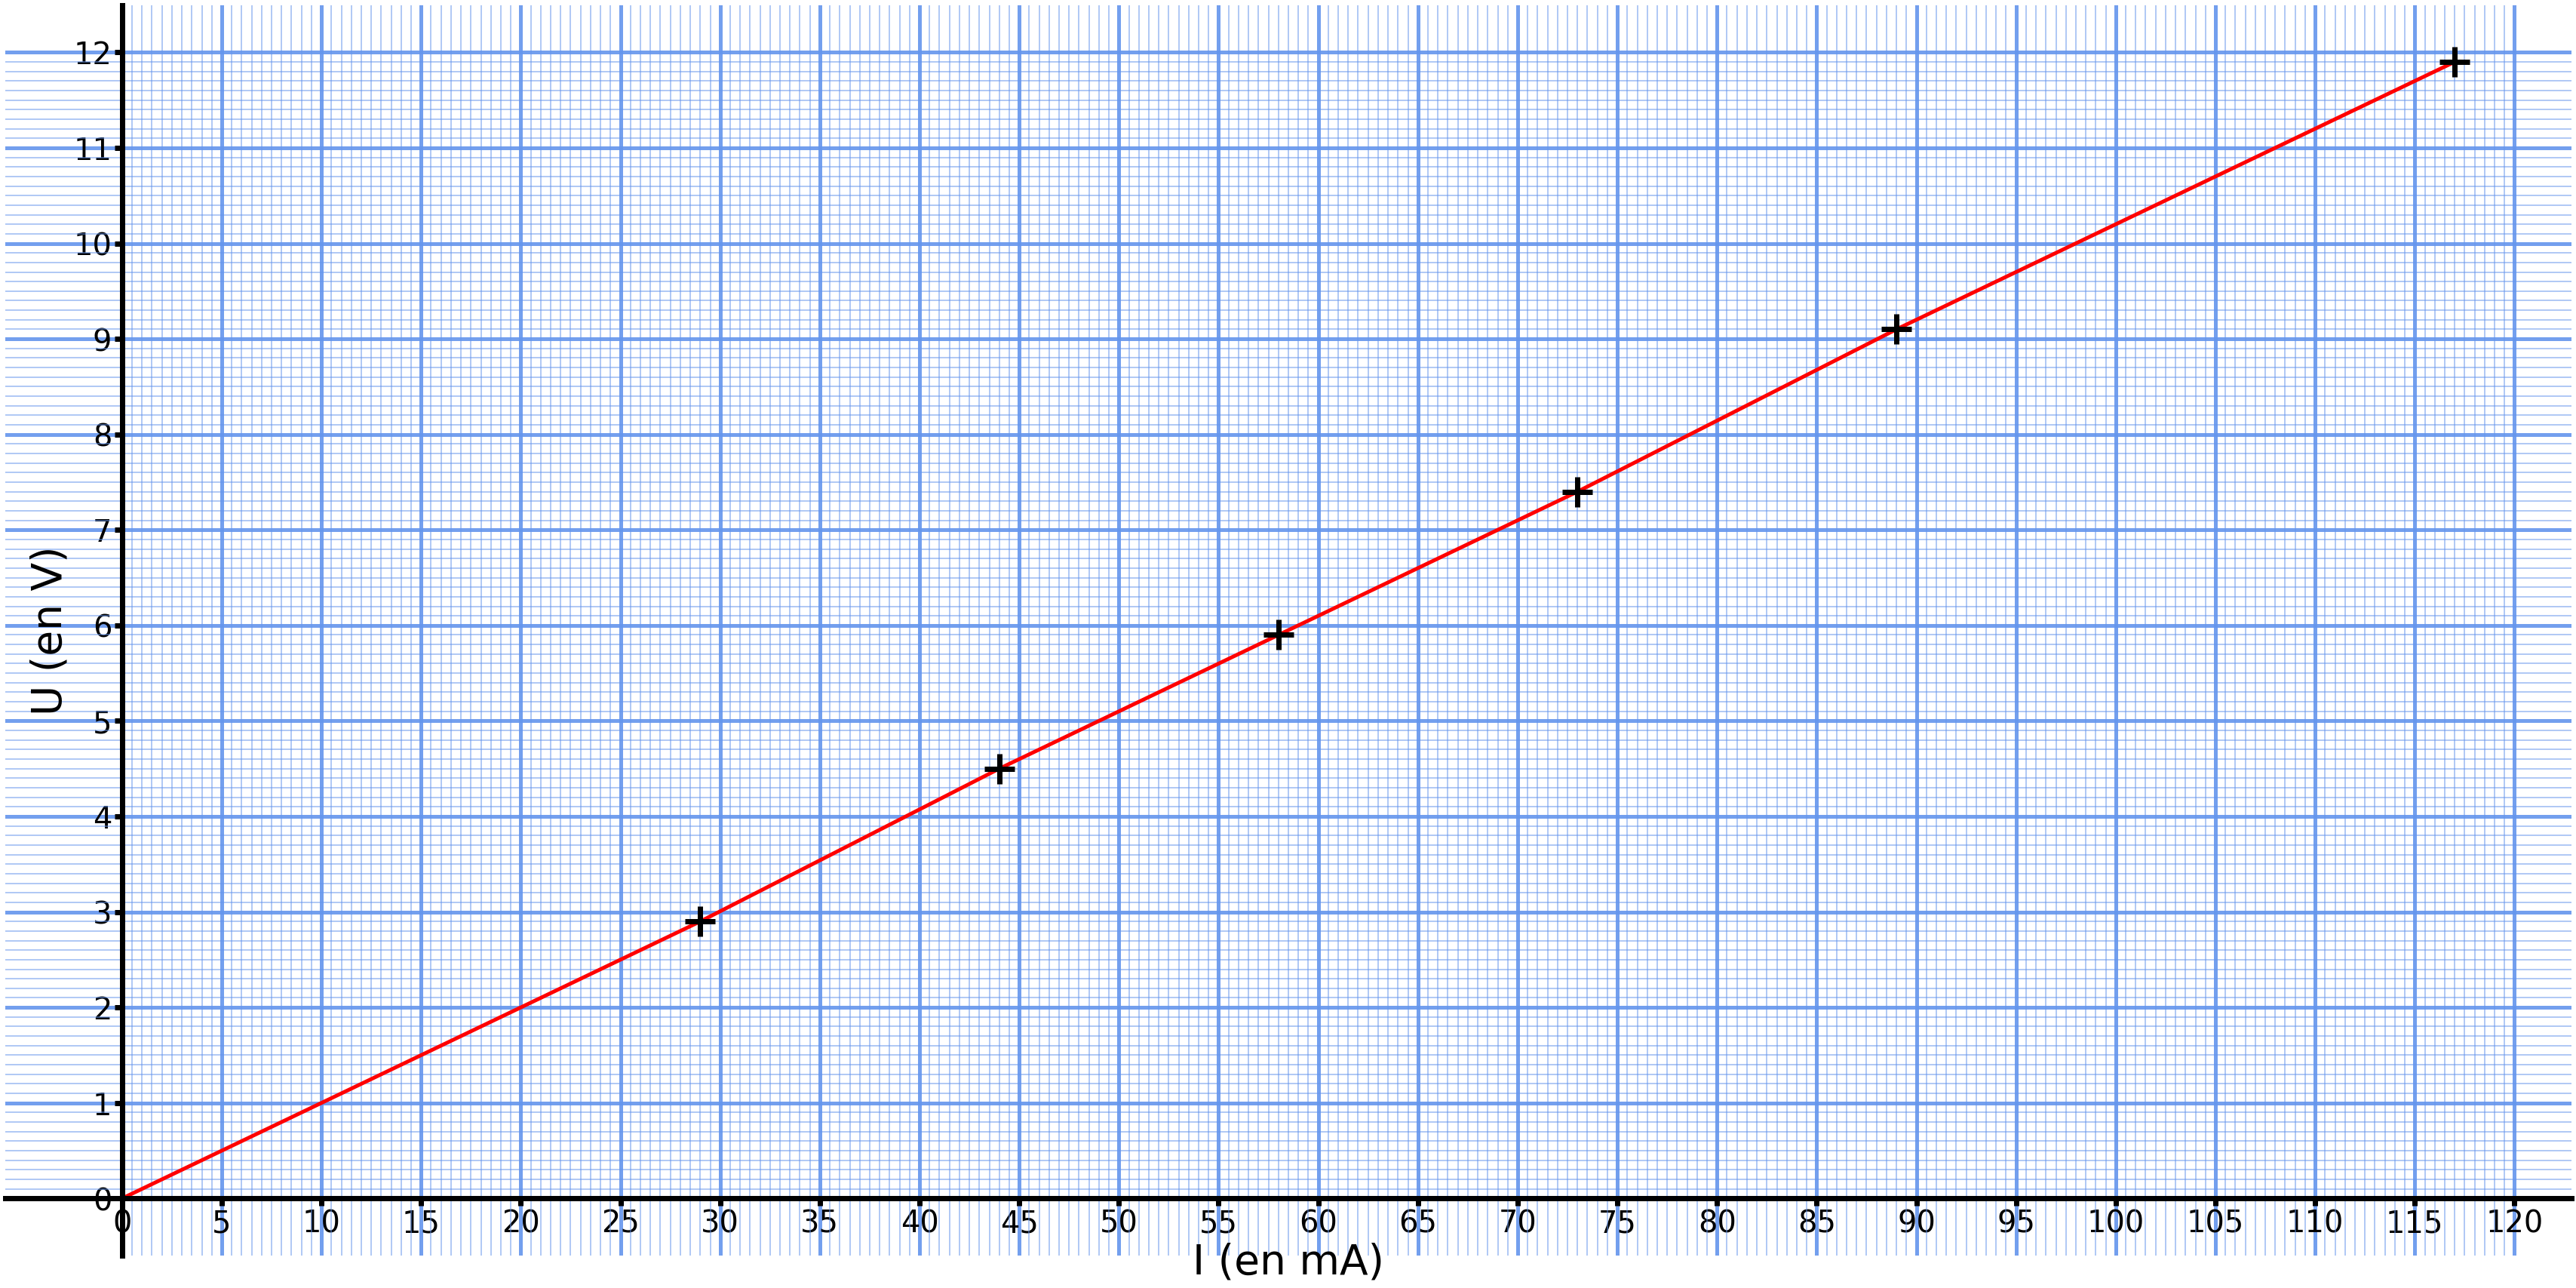

In [83]:
%matplotlib inline
cm = 1/2.54  # centimeters in inches

# LES MESURES
U = np.array([0, 2.9, 4.5, 5.9, 7.4, 9.1, 11.9])
I = np.array([0, 29, 44, 58, 73, 89, 117])

fig = plt.figure(figsize=(24/cm,12/cm))
ax = fig.add_subplot()

major_ticks_top = np.linspace(0,12,13)
minor_ticks_top = np.linspace(0,12,121)
major_ticks_bottom = np.linspace(0,120,25)
minor_ticks_bottom = np.linspace(0,120,241)

# LA GRILLE
ax.set_xticks(major_ticks_bottom)
ax.set_yticks(major_ticks_top)
ax.set_xticks(minor_ticks_bottom, minor=True)
ax.set_yticks(minor_ticks_top, minor=True)
ax.grid(which='major', alpha=0.9, color='cornflowerblue', lw=5)
ax.grid(which='minor', alpha=0.5, color='cornflowerblue', lw=2)


# LE PLOT
ax.plot(I,U,'r+-', ms=40, mec='k', mew=7, lw=5)


# LES AXES
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('data',0))
ax.spines['left'].set_linewidth(7)
ax.spines['bottom'].set_position(('data',0))
ax.spines['bottom'].set_linewidth(7)
ax.set_xlabel('I (en mA)', fontsize=55)
ax.set_ylabel('U (en V)', fontsize=55)

# Nous changeons la taille de la fonte des labels des ticks mineurs
ax.tick_params(axis='both', which='major', length=10, width=7, labelsize=40)

plt.show()

Si on remet l'intensité élctrique I en Ampères (de symbole A) :

coefficient de proportionnalité : 101.9524109675386


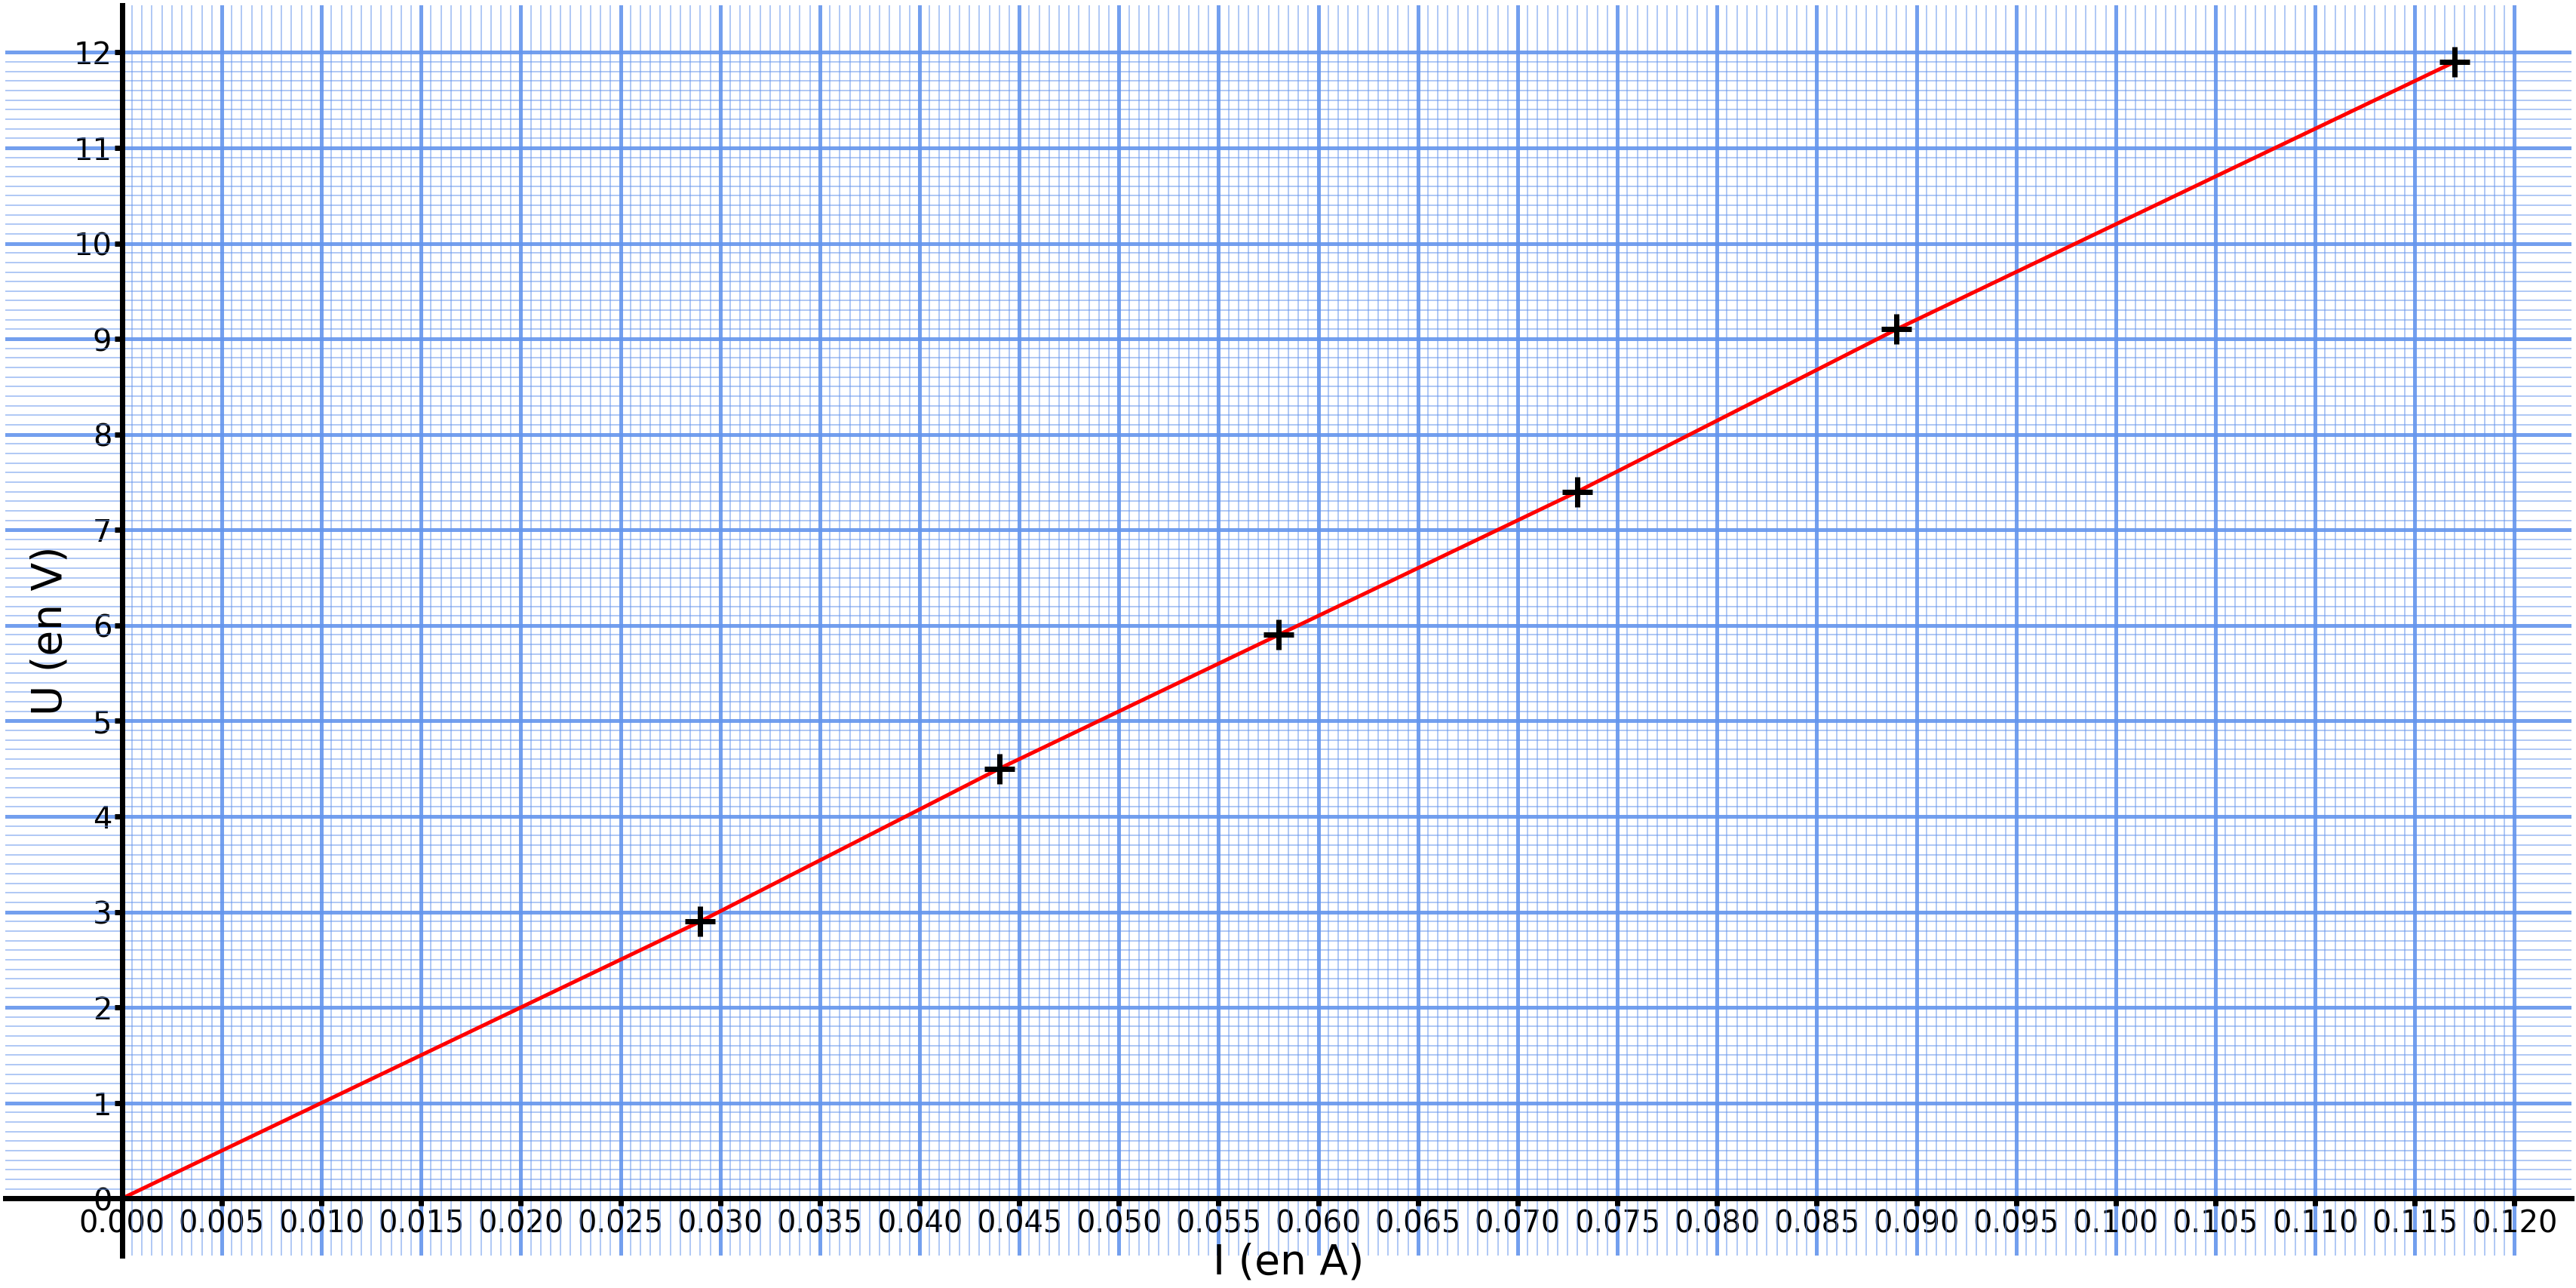

In [84]:
%matplotlib inline
cm = 1/2.54  # centimeters in inches

# LES MESURES
U = np.array([0, 2.9, 4.5, 5.9, 7.4, 9.1, 11.9])
I = np.array([0, 0.029, 0.044, 0.058, 0.073, 0.089, 0.117])

fig = plt.figure(figsize=(24/cm,12/cm))
ax = fig.add_subplot()

major_ticks_top = np.linspace(0,12,13)
minor_ticks_top = np.linspace(0,12,121)
major_ticks_bottom = np.linspace(0,0.120,25)
minor_ticks_bottom = np.linspace(0,0.120,241)

# LA GRILLE
ax.set_xticks(major_ticks_bottom)
ax.set_yticks(major_ticks_top)
ax.set_xticks(minor_ticks_bottom, minor=True)
ax.set_yticks(minor_ticks_top, minor=True)
ax.grid(which='major', alpha=0.9, color='cornflowerblue', lw=5)
ax.grid(which='minor', alpha=0.5, color='cornflowerblue', lw=2)


# LE PLOT
ax.plot(I,U,'r+-', ms=40, mec='k', mew=7, lw=5)


# LES AXES
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('data',0))
ax.spines['left'].set_linewidth(7)
ax.spines['bottom'].set_position(('data',0))
ax.spines['bottom'].set_linewidth(7)
ax.set_xlabel('I (en A)', fontsize=55)
ax.set_ylabel('U (en V)', fontsize=55)

# Nous changeons la taille de la fonte des labels des ticks mineurs
ax.tick_params(axis='both', which='major', length=10, width=7, labelsize=40)

#LA RÉGRESSION LINÉAIRE
droite = sci.linregress(I,U)
coeff = droite.slope
print("coefficient de proportionnalité :", coeff)
ord_orig = droite.intercept
#print("Ordonnée à l'origine :", ord_orig)

plt.show()